In [1]:
%cd "/content/drive/My Drive/BMI_Project/Proj1"

/content/drive/MyDrive/Proj1


In [ ]:
!git clone https://github.com/dmis-lab/biobert.git

fatal: destination path 'biobert' already exists and is not an empty directory.


In [2]:
%cd "biobert/"

/content/drive/MyDrive/Proj1/biobert


In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 411.0MB 40kB/s 
     |████████████████████████████████| 11.7MB 28.7MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 3.8MB 20.7MB/s 
     |████████████████████████████████| 512kB 56.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=6da4bc0e03edbbe85a8ab7faf390b07d34c0fc1cbef65b4fa7490d3ff466a528
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.23.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.1

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1cGqvAm9IZ_86C4Mj7Zf-w9CFilYVDl8j' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1cGqvAm9IZ_86C4Mj7Zf-w9CFilYVDl8j" -O "./data.tar.gz"

In [ ]:
!tar -xvzf 'data.tar.gz'
# Get the BERT MODEL ... at this point .. via uploading the file'
!tar -xvzf 'biobert_v1.1_pubmed.tar.gz'
!ls

In [ ]:
!python run_ner.py --do_train=true --do_eval=true --vocab_file=biobert_v1.1_pubmed/vocab.txt --bert_config_file=biobert_v1.1_pubmed/bert_config.json --init_checkpoint=biobert_v1.1_pubmed/model.ckpt-1000000 --num_train_epochs=10.0 --data_dir=datasets/NER/NCBI-disease --output_dir=ner_outputs

In [ ]:
!python run_ner.py --do_train=false --do_predict=true --vocab_file=biobert_v1.1_pubmed/vocab.txt --bert_config_file=biobert_v1.1_pubmed/bert_config.json --init_checkpoint=biobert_v1.1_pubmed/model.ckpt-1000000 --num_train_epochs=10.0 --data_dir=datasets/NER/NCBI-disease --output_dir=ner_outputs

## MIDTERM

B-Drug, B-Reason, B-Ade, I-Drug, I-Reason, I-Ade, O

In [ ]:
NER_OUTPUT_DIR = 'ner_outputs-BMI'
DATASET_DIR = 'datasets/NER/APNA'
# NER_OUTPUT_DIR = 'ner_outputs-DMIS'
# DATASET_DIR = 'datasets/NER/NCBI-disease'

In [ ]:
# TRAINING
# !rm -rf $NER_OUTPUT_DIR
!python run_ner.py --do_train=true --do_eval=true --max_seq_length=200 --vocab_file=biobert_v1.1_pubmed/vocab.txt --bert_config_file=biobert_v1.1_pubmed/bert_config.json --init_checkpoint=biobert_v1.1_pubmed/model.ckpt-1000000 --num_train_epochs=20.0 --data_dir=$DATASET_DIR --output_dir=$NER_OUTPUT_DIR

python3: can't open file 'run_ner.py': [Errno 2] No such file or directory


In [ ]:
# PREDICTION
!python run_ner.py --do_train=false --do_predict=true --max_seq_length=200 --vocab_file=biobert_v1.1_pubmed/vocab.txt --bert_config_file=biobert_v1.1_pubmed/bert_config.json --init_checkpoint=biobert_v1.1_pubmed/model.ckpt-1000000 --num_train_epochs=15.0 --data_dir=$DATASET_DIR --output_dir=$NER_OUTPUT_DIR


/usr/local/lib/python3.6/dist-packages/absl/flags/_validators.py:359: UserWarning: Flag --task_name has a non-None default value; therefore, mark_flag_as_required will pass even if flag is not specified in the command line!
  'command line!' % flag_name)


W1103 08:19:28.586781 140237783918464 module_wrapper.py:139] From run_ner.py:479: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W1103 08:19:28.586998 140237783918464 module_wrapper.py:139] From run_ner.py:479: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W1103 08:19:28.587199 140237783918464 module_wrapper.py:139] From /content/drive/My Drive/Proj1/biobert/modeling.py:92: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W1103 08:19:29.021537 140237783918464 module_wrapper.py:139] From run_ner.py:494: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

ner
{'ner': <class 

In [ ]:
!python biocodes/ner_detokenize.py --token_test_path=$NER_OUTPUT_DIR/token_test.txt --label_test_path=$NER_OUTPUT_DIR/label_test.txt --answer_path=$DATASET_DIR/test.tsv --output_dir=$NER_OUTPUT_DIR

--------------------------------------------------------------
['Admission', 'Date', '2109721', 'Discharge', 'Date', '2109813', 'Date', 'of', 'Birth', '205365', 'Sex', 'F', 'Service', 'Doctor', 'Last', 'Name', '1181', 'MEDICINE', 'HISTORY', 'OF', 'PRESENT', 'ILLNESS', 'This', 'is', 'a', '56', 'year', 'old', 'white', 'female', 'with', 'a', 'history', 'of', 'right', 'frontal', 'craniotomy', 'on', '210971', 'for', 'a', 'dysembryoplastic', 'angioneural', 'epithelial', 'lesion', 'with', 'features', 'of', 'an', 'oligodendroglioma', 'who', 'was', 'started', 'on', 'Dilantin', 'postoperatively', 'for', 'seizure', 'prophylaxis', 'and', 'was', 'subsequently', 'developed', 'eye', 'discharge', 'and', 'was', 'seen', 'by', 'an', 'optometrist', 'who', 'treated', 'it', 'with', 'sulfate', 'ophthalmic', 'drops', 'The', 'patient', 'then', 'developed', 'oral', 'sores', 'and', 'rash', 'in', 'the', 'chest', 'the', 'night', 'before', 'admission', 'which', 'rapidly', 'spread', 'to', 'the', 'face', 'trunk', 'an

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



NER detokenize done


In [ ]:
!perl biocodes/conlleval.pl < $NER_OUTPUT_DIR/NER_result_conll.txt

processed 394579 tokens with 13178 phrases; found: 13790 phrases; correct: 10771.
accuracy:  98.19%; precision:  78.11%; recall:  81.73%; FB1:  79.88
         Ade-MISC: precision:  45.26%; recall:  48.13%; FB1:  46.65  654
        Drug-MISC: precision:  88.11%; recall:  90.04%; FB1:  89.06  10278
      Reason-MISC: precision:  49.65%; recall:  56.65%; FB1:  52.92  2858


In [ ]:
# %cd $NER_OUTPUT_DIR
NER_OUTPUT_DIR = 'ner_outputs-BMI'
DATASET_DIR = 'datasets/NER/APNA'
%cd /content/drive/My Drive/BMI_Project/Proj1/biobert/$NER_OUTPUT_DIR

file1 = open("NER_result_conll.txt","r") 
prevTok, prevAns, prevPred = None, None, None
trueEntity = 0
ansLabArr = []
predLabArr = []
for f in file1:
  tok, ansLab, predLab = f.split()
  # print(ansLab, predLab)
  #  and prevAns and ansLab[2:] == prevAns[2:]
  if ansLab[:2] == "I-":
    if predLab[2:-5] == ansLabArr[-1]:
      predLabArr[-1] = ansLabArr[-1]

    # pass
  else:
    trueEntity += 1
    if ansLab[2:-5]:
      ansLabArr.append(ansLab[2:-5])
    else:
      ansLabArr.append("O")
    if predLab[2:-5]:
      predLabArr.append(predLab[2:-5])
    else:
      predLabArr.append("O")

import collections
print(collections.Counter(ansLabArr))
print(collections.Counter(predLabArr))

# print(len(ansLabArr), ansLabArr)
# print(len(predLabArr), predLabArr)

# print(list(zip(ansLabArr, predLabArr)))


/content/drive/My Drive/Proj1/biobert/ner_outputs-BMI
Counter({'O': 377754, 'Drug': 10057, 'Reason': 2505, 'Ade': 615})
Counter({'O': 375812, 'Drug': 10468, 'Reason': 3802, 'Ade': 849})


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
# actual = [1,0,0,1,0,0,1,0,0,1]
actual = ansLabArr
# predicted values
# predicted = [1,0,0,1,0,0,0,1,0,0]
predicted = predLabArr

# confusion matrix

# print('Confusion matrix for Lenient Matching: \n\n     Ade     Drug      Reason     O \n', matrix)

matrix = confusion_matrix(actual,predicted, labels=["Ade", "Drug", "Reason", "O"])
print('   Lenient Matching: \n\n     Ade     Drug   Reason   O \n', matrix)

   Lenient Matching: 

     Ade     Drug   Reason   O 
 [[   351      1     52    211]
 [     3   9320     17    717]
 [    42     13   1701    749]
 [   453   1134   2032 374135]]


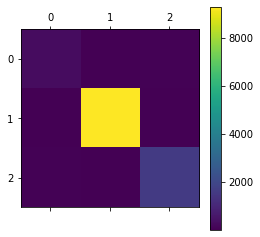

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
plt.matshow(matrix)

cmap = mpl.cm.cool
# mpl.colorbar.ColorbarBase(cmap=cmap)
# plt.colorbar(cm.ScalarMappable(cmap=cmap))
plt.colorbar()
plt.show()

In [ ]:
file1 = open("NER_result_conll.txt","r") 
prevTok, prevAns, prevPred = None, None, None
trueEntity = 0
ansLabArr = []
predLabArr = []
for f in file1:
  tok, ansLab, predLab = f.split()
  # if ansLab[:2] != "O-" and ansLab[2:] != "Drug-MISC":
  #   print(tok, ansLab, predLab)
  # print(ansLab, predLab)
  if ansLab[:2] == "I-":
    # pass
    #  and ansLab[2:] == predLab[2:]
    if ansLab[2:] == predLab[2:] or ansLabArr[-1] == predLabArr[-1]:
      if ansLab == predLab and ansLabArr[-1] == predLabArr[-1]:
        pass
      else:
        if "partial-" not in predLabArr[-1]:
          predLabArr[-1] = "partial-"+predLabArr[-1]
    # if ansLab == predLab and ansLabArr[-1] == predLabArr[-1]:
    #   pass
    # elif ansLab[2:] == predLab[2:] or ansLabArr[-1] == predLabArr[-1]:
    # else:
    #   predLabArr[-1] = "O"


  else:
    trueEntity += 1
    if ansLab[2:-5]:
      ansLabArr.append(ansLab[2:-5])
    else:
      ansLabArr.append("O")
    if predLab[2:-5]:
      predLabArr.append(predLab[2:-5])
    else:
      predLabArr.append("O")

    # if ansLab == predLab:
    #   # ansLabArr.append(ansLab[2:-5])
    #   if ansLab[2:-5]:
    #     ansLabArr.append(ansLab[2:-5])
    #     predLabArr.append(predLab[2:-5])
    #   else:
    #     ansLabArr.append("O")
    #     predLabArr.append("O")
    # else:
    #   if ansLab[2:-5]:
    #     ansLabArr.append(ansLab[2:-5])
    #     predLabArr.append("O")
    #   else:
    #     ansLabArr.append("O")
    #     predLabArr.append("O")



# print(trueEntity)
  # prevAns = ansLab[2:-5]
  # prevPred = 
import collections
print(collections.Counter(ansLabArr))
print(collections.Counter(predLabArr))
# print(len(ansLabArr), ansLabArr)
# print(len(predLabArr), predLabArr)

# print(list(zip(ansLabArr, predLabArr)))

Counter({'O': 377754, 'Drug': 10057, 'Reason': 2505, 'Ade': 615})
Counter({'O': 375811, 'Drug': 10338, 'Reason': 3639, 'Ade': 813, 'partial-O': 156, 'partial-Drug': 102, 'partial-Reason': 61, 'partial-Ade': 11})


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
# actual = [1,0,0,1,0,0,1,0,0,1]
actual = ansLabArr
# predicted values
# predicted = [1,0,0,1,0,0,0,1,0,0]
predicted = predLabArr

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=["Ade", "Drug", "Reason", "O"])
print('           Exact Matching: \n\n     Ade     Drug   Reason   O \n', matrix)

# print("Ade    -> " ,matrix[0])
# print("Drug   -> " ,matrix[1])
# print("Reason -> " ,matrix[2])

# outcome values order in sklearn
# tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=["Ade", "Drug", "Reason", "O"]).reshape(-1)
# print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
# matrix = classification_report(actual,predicted,labels=["Ade", "Drug", "Reason", "O"])
# print('Classification report : \n',matrix)

           Exact Matching: 

     Ade     Drug   Reason   O 
 [[   315      1     52    211]
 [     3   9190     17    717]
 [    42     13   1538    749]
 [   453   1134   2032 374134]]


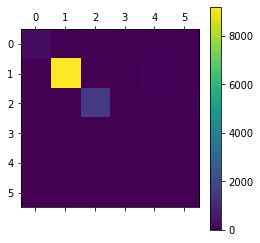

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
plt.matshow(matrix)
  
cmap = mpl.cm.cool
# mpl.colorbar.ColorbarBase(cmap=cmap)
# plt.colorbar(cm.ScalarMappable(cmap=cmap))
plt.colorbar()
plt.show()

##END-SEM - TRAINING - CLINICAL


In [ ]:
# https://github.com/EmilyAlsentzer/clinicalBERT
# !wget -O pretrained_bert_tf.tar.gz https://www.dropbox.com/s/8armk04fu16algz/pretrained_bert_tf.tar.gz?dl=1


--2020-11-24 08:46:52--  https://www.dropbox.com/s/8armk04fu16algz/pretrained_bert_tf.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.1, 2620:100:6020:1::a27d:4001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/8armk04fu16algz/pretrained_bert_tf.tar.gz [following]
--2020-11-24 08:46:52--  https://www.dropbox.com/s/dl/8armk04fu16algz/pretrained_bert_tf.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4104d511145d4043691e7d5552.dl.dropboxusercontent.com/cd/0/get/BDyHkaoBN78Sa75wiKFO7ffMPtHQ1bJhc8hF_otwPCZGKkEuu0kz4Hsfv1cg7wlbgp9OVNmMjqrftDP6Gw7soeQMxjV1LfE5Kr_y4mzGYWaxPhhv6OVOp555Nk28onHIvVI/file?dl=1# [following]
--2020-11-24 08:46:52--  https://uc4104d511145d4043691e7d5552.dl.dropboxusercontent.com/cd/0/get/BDyHkaoBN78Sa75wiKFO7ffMPtHQ1bJhc8hF_otwPCZGKkEuu0kz4Hsfv1cg7wlbgp9OVN

In [ ]:
!tar -xf pretrained_bert_tf.tar.gz
%cd pretrained_bert_tf/
# !tar -xf bert_pretrain_output_all_notes_150000.tar.gz
# !tar -xf bert_pretrain_output_disch_100000.tar.gz
!tar -xf biobert_pretrain_output_all_notes_150000.tar.gz
# !tar -xf biobert_pretrain_output_disch_100000.tar.gz

/content/drive/My Drive/Proj1/biobert/pretrained_bert_tf


In [ ]:
!tar -xvf pretrained_bert_tf/biobert_pretrain_output_disch_100000.tar.gz

biobert_pretrain_output_disch_100000/
biobert_pretrain_output_disch_100000/model.ckpt-100000.data-00000-of-00001
biobert_pretrain_output_disch_100000/graph.pbtxt
biobert_pretrain_output_disch_100000/model.ckpt-100000.meta
biobert_pretrain_output_disch_100000/bert_config.json
biobert_pretrain_output_disch_100000/vocab.txt
biobert_pretrain_output_disch_100000/pytorch_model.bin
biobert_pretrain_output_disch_100000/model.ckpt-100000.index


In [ ]:
NER_OUTPUT_DIR = 'pretrained_bert_tf/biobert_pretrain_output_all_notes_150000/output15012Check'
PRE_FOLD = 'pretrained_bert_tf/biobert_pretrain_output_all_notes_150000'
DATASET_DIR = 'datasets/NER/APNA'

In [ ]:
from datetime import datetime
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)	

date and time = 25/11/2020 17:29:40


In [ ]:
!python run_ner.py --do_train=true --do_eval=true --max_seq_length=180 --vocab_file=$PRE_FOLD/vocab.txt --bert_config_file=$PRE_FOLD/bert_config.json --init_checkpoint=$PRE_FOLD/model.ckpt-150000 --num_train_epochs=15.0 --data_dir=$DATASET_DIR --output_dir=$NER_OUTPUT_DIR

Streaming output truncated to the last 5000 lines.
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual

In [ ]:
from datetime import datetime
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)	

date and time = 25/11/2020 13:30:31


In [ ]:
!python run_ner.py --do_train=false --do_predict=true --max_seq_length=200 --vocab_file=$PRE_FOLD/vocab.txt --bert_config_file=$PRE_FOLD/bert_config.json --init_checkpoint=$PRE_FOLD/model.ckpt-150000 --num_train_epochs=15.0 --data_dir=$DATASET_DIR --output_dir=$NER_OUTPUT_DIR


/usr/local/lib/python3.6/dist-packages/absl/flags/_validators.py:359: UserWarning: Flag --task_name has a non-None default value; therefore, mark_flag_as_required will pass even if flag is not specified in the command line!
  'command line!' % flag_name)


W1125 14:46:33.676122 140560798439296 module_wrapper.py:139] From run_ner.py:479: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W1125 14:46:33.676525 140560798439296 module_wrapper.py:139] From run_ner.py:479: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W1125 14:46:33.676842 140560798439296 module_wrapper.py:139] From /content/drive/My Drive/Proj1/biobert/modeling.py:92: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W1125 14:46:34.256739 140560798439296 module_wrapper.py:139] From run_ner.py:494: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

ner
{'ner': <class 

In [ ]:
!python biocodes/ner_detokenize.py --token_test_path=$NER_OUTPUT_DIR/token_test.txt --label_test_path=$NER_OUTPUT_DIR/label_test.txt --answer_path=$DATASET_DIR/test.tsv --output_dir=$NER_OUTPUT_DIR

--------------------------------------------------------------


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




394579
394579
--------------------------------------------------------------
len(bert_pred['toks']):  394579 len(ans['labels']):  394579
NER detokenize done


In [ ]:
!perl biocodes/conlleval.pl < $NER_OUTPUT_DIR/NER_result_conll.txt

processed 394579 tokens with 13178 phrases; found: 12605 phrases; correct: 9318.
accuracy:  97.85%; precision:  73.92%; recall:  70.71%; FB1:  72.28
         Ade-MISC: precision:  42.48%; recall:  42.28%; FB1:  42.38  612
        Drug-MISC: precision:  82.27%; recall:  76.76%; FB1:  79.42  9385
      Reason-MISC: precision:  51.27%; recall:  53.37%; FB1:  52.30  2608


In [ ]:
!perl biocodes/conlleval.pl < $NER_OUTPUT_DIR/NER_result_conll.txt

processed 394579 tokens with 13178 phrases; found: 12605 phrases; correct: 9318.
accuracy:  97.85%; precision:  73.92%; recall:  70.71%; FB1:  72.28
         Ade-MISC: precision:  42.48%; recall:  42.28%; FB1:  42.38  612
        Drug-MISC: precision:  82.27%; recall:  76.76%; FB1:  79.42  9385
      Reason-MISC: precision:  51.27%; recall:  53.37%; FB1:  52.30  2608


## END - SEM - Discharge Summary + ENSEMBLE

In [ ]:
from datetime import datetime
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)	

date and time = 25/11/2020 17:36:18


In [ ]:
NER_OUTPUT_DIR = 'pretrained_bert_tf/biobert_pretrain_output_disch_100000/output10'
PRE_FOLD = 'pretrained_bert_tf/biobert_pretrain_output_disch_100000'
DATASET_DIR = 'datasets/NER/APNA'
!python run_ner.py --do_train=true --do_eval=true --max_seq_length=180 --vocab_file=$PRE_FOLD/vocab.txt --bert_config_file=$PRE_FOLD/bert_config.json --init_checkpoint=$PRE_FOLD/model.ckpt-100000 --num_train_epochs=10.0 --data_dir=$DATASET_DIR --output_dir=$NER_OUTPUT_DIR

Streaming output truncated to the last 5000 lines.
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual empty lines detected!
Two continual

In [ ]:
from datetime import datetime
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)	

date and time = 25/11/2020 22:01:51


In [ ]:
!python run_ner.py --do_train=false --do_predict=true --max_seq_length=200 --vocab_file=$PRE_FOLD/vocab.txt --bert_config_file=$PRE_FOLD/bert_config.json --init_checkpoint=$PRE_FOLD/model.ckpt-100000 --num_train_epochs=10.0 --data_dir=$DATASET_DIR --output_dir=$NER_OUTPUT_DIR


/usr/local/lib/python3.6/dist-packages/absl/flags/_validators.py:359: UserWarning: Flag --task_name has a non-None default value; therefore, mark_flag_as_required will pass even if flag is not specified in the command line!
  'command line!' % flag_name)


W1125 22:03:49.360916 139783462696832 module_wrapper.py:139] From run_ner.py:479: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W1125 22:03:49.361153 139783462696832 module_wrapper.py:139] From run_ner.py:479: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W1125 22:03:49.361335 139783462696832 module_wrapper.py:139] From /content/drive/My Drive/Proj1/biobert/modeling.py:92: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W1125 22:03:49.928842 139783462696832 module_wrapper.py:139] From run_ner.py:494: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

ner
{'ner': <class 

In [ ]:
!python biocodes/ner_detokenize.py --token_test_path=$NER_OUTPUT_DIR/token_test.txt --label_test_path=$NER_OUTPUT_DIR/label_test.txt --answer_path=$DATASET_DIR/test.tsv --output_dir=$NER_OUTPUT_DIR

--------------------------------------------------------------


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




394579
394579
['Admission', 'Date', '2109721', 'Discharge', 'Date', '2109813', 'Date', 'of', 'Birth', '205365', 'Sex', 'F', 'Service', 'Doctor', 'Last', 'Name', '1181', 'MEDICINE', 'HISTORY', 'OF', 'PRESENT', 'ILLNESS', 'This', 'is', 'a', '56', 'year', 'old', 'white', 'female', 'with', 'a', 'history', 'of', 'right', 'frontal', 'craniotomy', 'on', '210971', 'for', 'a', 'dysembryoplastic', 'angioneural', 'epithelial', 'lesion', 'with', 'features', 'of', 'an', 'oligodendroglioma', 'who', 'was', 'started', 'on', 'Dilantin', 'postoperatively', 'for', 'seizure', 'prophylaxis', 'and', 'was', 'subsequently', 'developed', 'eye', 'discharge', 'and', 'was', 'seen', 'by', 'an', 'optometrist', 'who', 'treated', 'it', 'with', 'sulfate', 'ophthalmic', 'drops', 'The', 'patient', 'then', 'developed', 'oral', 'sores', 'and', 'rash', 'in', 'the', 'chest', 'the', 'night', 'before', 'admission', 'which', 'rapidly', 'spread', 'to', 'the', 'face', 'trunk', 'and', 'upper', 'extremities', 'within', 'the', 'la

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



NER detokenize done


In [ ]:
!perl biocodes/conlleval.pl < $NER_OUTPUT_DIR/NER_result_conll.txt

NER_OUTPUT_DIR = 'pretrained_bert_tf/biobert_pretrain_output_all_notes_150000/output15'
PRE_FOLD = 'pretrained_bert_tf/biobert_pretrain_output_all_notes_150000'

processed 394579 tokens with 13178 phrases; found: 13806 phrases; correct: 11080.
accuracy:  98.41%; precision:  80.25%; recall:  84.08%; FB1:  82.12
         Ade-MISC: precision:  45.31%; recall:  46.34%; FB1:  45.82  629
        Drug-MISC: precision:  88.69%; recall:  93.00%; FB1:  90.79  10547
      Reason-MISC: precision:  54.79%; recall:  57.52%; FB1:  56.12  2630


In [ ]:
import csv
predlabel1 = []
predlabel2 = []
predlabel3 = [] 
count ={}

with open('/content/drive/MyDrive/biobert/FinalOp/Discharge/NER_result_conll.txt') as f1:
  for row1 in f1:
    # tok, ansLab
    arr1 = row1.split()
    if len(arr1) == 3:
      tok, ansLab, predLab = arr1
    else:
      print(arr1)
    # tok, ansLab, predLab = row1.split()
    predlabel1.append(predLab)
    #print(row1.split())
  f1.close()

with open('/content/drive/MyDrive/biobert/FinalOp/AllNotes/NER_result_conll.txt') as f2:
    for row2 in f2:
      tok, ansLab, predLab = row2.split()
      predlabel2.append(predLab)
    f2.close()

with open('/content/drive/MyDrive/biobert/FinalOp/Biobert/NER_result_conll.txt') as f3:
  for row3 in f3:
    #print(row)
    tok, ansLab, predLab = row3.split()
    predlabel3.append(predLab)
  f3.close()


In [ ]:
import collections
from collections import Counter
count = {}
new_pred = []

arr = list(zip(predlabel1,predlabel2,predlabel3))
for i in range(len(arr)):
  count = collections.Counter(arr[i])
  ele = count.most_common()[0][0]

  # if ele in count:

  # if predlabel1[i]!=predlabel2[i] and predlabel1[i]!=predlabel3[i]:
  #   new_pred.append(predlabel1[i])
  # else:
    
    # listLabel = []
    # listLabel.append(predlabel1[i])
    # listLabel.append(predlabel2[i])
    # listLabel.append(predlabel3[i])
    # new_pred.append(max(set(listLabel), key = listLabel.count))
  new_pred.append(ele)

new_pred

In [ ]:
ensemble_file = open("/content/drive/MyDrive/biobert/FinalOp/Ensemble_result_conll.txt","w") 
with open('/content/drive/MyDrive/biobert/FinalOp/Discharge/NER_result_conll.txt') as f1:
  
  for ind, row1 in enumerate(f1):
    # tok, ansLab
    tok, ansLab, _ = row1.split()
    ensemble_file.write(tok+" "+ansLab+" "+new_pred[ind]+"\n")

  ensemble_file.close()
  f1.close()

In [4]:
!perl biocodes/conlleval.pl < FinalOp/Ensemble_result_conll.txt

processed 394579 tokens with 13178 phrases; found: 13535 phrases; correct: 11115.
accuracy:  98.49%; precision:  82.12%; recall:  84.35%; FB1:  83.22
         Ade-MISC: precision:  51.32%; recall:  47.48%; FB1:  49.32  569
        Drug-MISC: precision:  89.25%; recall:  93.29%; FB1:  91.23  10513
      Reason-MISC: precision:  58.70%; recall:  57.49%; FB1:  58.09  2453
